# Customer Churn classification
# 📌 Resumo do Projeto

Este projeto tem como objetivo analisar e prever o **churn de clientes bancários**, identificando quais clientes possuem maior probabilidade de encerrar seus serviços. Como reter um cliente é muito mais barato do que adquirir um novo, prever churn é essencial para reduzir perdas e orientar decisões estratégicas.

Ao longo do notebook, será desenvolvida uma solução completa que envolve:

- Definição do problema e sua importância  
- Análise exploratória dos dados  
- Tratamento e preparação do dataset  
- Treinamento e avaliação de um modelo de Machine Learning  
- Interpretação dos resultados e insights para retenção  

---

# 🙌 Acknowledgements

💡 É amplamente reconhecido no setor financeiro que manter um cliente existente custa muito menos do que conquistar um novo.  
Por isso, compreender os motivos que levam ao churn é fundamental para:

- Criar estratégias de retenção  
- Melhorar a experiência do cliente  
- Construir programas de fidelidade  
- Identificar perfis de risco com antecedência  

Este projeto mostra como Machine Learning pode auxiliar nesse processo, transformando dados em ações concretas.

---

# 🛠 Abordagem Técnica

A abordagem utilizada segue uma pipeline estruturada de Ciência de Dados:

1. **Carregamento e entendimento do dataset**
2. **Análise Exploratória (EDA)**  
3. **Pré-processamento e codificação das variáveis**  
4. **Balanceamento das classes com SMOTE**  
5. **Treinamento do modelo (Random Forest)**  
6. **Avaliação, análise de métricas e ajuste de threshold**  
7. **Interpretação das variáveis mais importantes**

---

# 📂 Dataset — Explicação das Features

Abaixo, a descrição objetiva de cada coluna do dataset:

- **RowNumber** — número da linha do registro.  
- **CustomerId** — identificador único do cliente.  
- **Surname** — sobrenome do cliente.  
- **CreditScore** — pontuação de crédito do cliente.  
- **Geography** — país ou região onde o cliente reside.  
- **Gender** — gênero do cliente.  
- **Age** — idade do cliente.  
- **Tenure** — quantidade de anos que o cliente está no banco.  
- **Balance** — saldo da conta do cliente.  
- **NumOfProducts** — número de produtos contratados pelo cliente.  
- **HasCrCard** — indica se o cliente possui cartão de crédito.  
- **IsActiveMember** — indica se o cliente é um membro ativo.  
- **EstimatedSalary** — salário estimado do cliente.  
- **Exited** — variável alvo; indica se o cliente deixou o banco (1) ou não (0).  
- **Complain** — indica se o cliente realizou alguma reclamação.  
- **Satisfaction Score** — nota de satisfação do cliente.  
- **Card Type** — tipo de cartão que o cliente possui.  
- **Points Earned** — pontos acumulados pelo cliente.  

---



## 1. Importações iniciais e primeiro contato com o dataset :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

color_palette = ['#fcfdbf', '#3b0f70', '#000004']
df = pd.read_csv('../data/customer_dataset.csv')

In [2]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,10,0.00,1,1,0,78800.890983,1,1,1,DIAMOND,937.856785
1,2,15647311,Hill,608,Spain,Female,41,5,83807.86,1,0,1,158028.418692,0,1,4,DIAMOND,688.714393
2,3,15619304,Onio,502,France,Female,42,2,159660.80,3,1,0,59093.415704,1,1,1,DIAMOND,668.528860
3,4,15701354,Boni,699,France,Female,39,9,0.00,2,0,0,133175.002624,0,0,5,GOLD,944.974853
4,5,15737888,Mitchell,850,Spain,Female,43,4,125510.82,1,1,1,93270.327728,0,1,3,GOLD,108.192250
5,6,15574012,Chu,645,Spain,Male,44,9,113755.78,2,1,1,115158.822007,0,0,3,DIAMOND,552.984593
6,7,15592531,Bartlett,822,France,Male,50,9,0.00,2,1,1,147950.678252,0,0,3,SILVER,259.177001
7,8,15656148,Obinna,376,Germany,Female,29,10,115046.74,4,1,1,130827.204548,0,0,2,DIAMOND,286.692505
8,9,15792365,He,501,France,Male,44,8,142051.07,2,0,0,200487.559088,0,0,3,GOLD,458.747559
9,10,15592389,H?,684,France,Male,27,10,134603.88,1,1,1,237621.052911,0,0,5,GOLD,661.667244


In [3]:
print(f'O dataset é composto por {df.shape[0]} linhas e {df.shape[1]} colunas.')
print('\nTipos de dados:')
print(df.dtypes.value_counts())

print('\nValores ausentes:')
print(df.isnull().sum().sum())

O dataset é composto por 10000 linhas e 18 colunas.

Tipos de dados:
int64      11
object      4
float64     3
Name: count, dtype: int64

Valores ausentes:
0


# 1.1 Excluindo colunas irrelevantes : 

In [4]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'], inplace=True)

# 1.2 Informações estatísticas sobre o dataset : 

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.90,2.75,0.00,4.00,6.00,8.00,10.00
Balance,10000.0,70832.44,63261.03,0.00,0.00,89687.43,125488.27,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.54,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,107374.16,55347.96,4.91,65730.64,104778.35,144962.86,327862.01
Exited,10000.0,0.07,0.26,0.00,0.00,0.00,0.00,1.00
Complain,10000.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00


**Tenure** — **média: 5.9 anos**
Base composta majoritariamente por clientes antigos, evidenciando relacionamento consistente com o banco.

**HasCrCard** — **média: 0.71**
Como é binária, indica que a maioria dos clientes possui cartão de crédito.

**IsActiveMember** — **média: 0.54**
Leve predominância de clientes ativos, sugerindo engajamento moderado.

### Churn e Reclamações :

**Exited** — média baixa

Classe minoritária → baixo churn.
(Importante observar para futuros modelos devido ao desequilíbrio.)

**Complain** — média baixa
Poucas reclamações registradas, indicando desbalanceamento nesta classe.

**Satisfaction Score** - Média alta (3.6)

O banco atende às reclamações e trata de resolver as queixas.


## 2. Análise Exploratória de Dados (EDA)

### 2.1  Análise do Balanceamento da Variável Alvo (Exited)

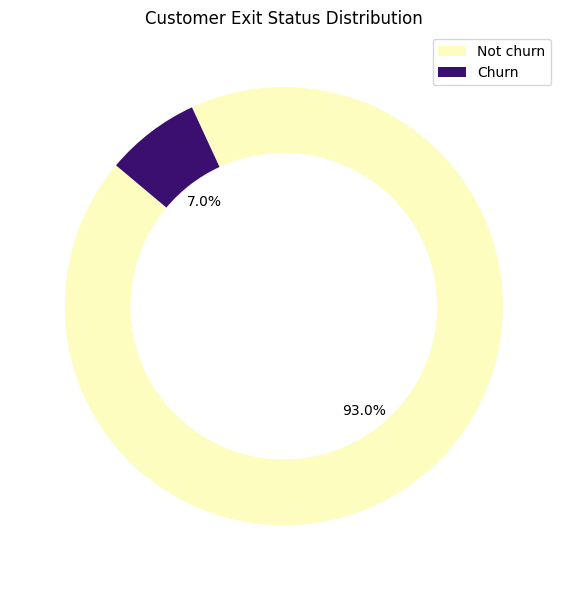

In [6]:
exit_status = df['Exited'].value_counts()
exit_labels = ['Not churn', 'Churn']

plt.figure(figsize=(12, 6))
plt.pie(exit_status, autopct='%1.1f%%', colors=color_palette, startangle=140, wedgeprops=dict(width=0.3), )
plt.legend(labels=exit_labels)
plt.title('Customer Exit Status Distribution')

plt.tight_layout()
plt.show()


Durante a etapa de Análise Exploratória dos Dados (EDA), foi identificado um **desbalanceamento significativo** na variável alvo **Exited**, que indica se um cliente deixou o banco (**1**) ou não (**0**).  
A maior parte dos registros corresponde a clientes que **não saíram** (**Exited = 0**), enquanto apenas cerca de **7%** representam casos de churn (**Exited = 1**)


### ⚠️ Impactos do desbalanceamento

- O algoritmo tende a **aprender** muito mais sobre a classe majoritária (clientes que não saíram).  
- A classe minoritária (**Exited = 1**) pode ser **ignorada**, reduzindo drasticamente a capacidade do modelo de prever churn.  
- Isso compromete diretamente ações estratégicas do negócio, como prever e reter clientes com risco de saída.


### 🛠️ Estratégia de Balanceamento: SMOTE

Para corrigir esse desequilíbrio e permitir que o modelo aprenda adequadamente o padrão de churn, será aplicada a técnica **SMOTE (Synthetic Minority Oversampling Technique)**.

O SMOTE funciona gerando **novas amostras sintéticas da classe minoritária**, em vez de apenas duplicá-las, o que ajuda a:

- aumentar o número de exemplos de churn,  
- reduzir o viés em direção à classe majoritária,  
- melhorar a capacidade do modelo de identificar padrões reais de saída de clientes,  
- evitar overfitting comum em técnicas simples de oversampling.

### 🎯 Métricas mais adequadas

Além de balancear a base, utilizaremos métricas que lidam melhor com desbalanceamento, como:

- **Precision**  
- **Recall**  
- **F1-Score**  
- **AUC-ROC**  

Essas métricas oferecem uma visão muito mais clara do desempenho real do modelo, especialmente para identificar corretamente clientes em risco de churn.




### 2.1 distribuições de idade, saldo da conta (balance) e score de crédito  :

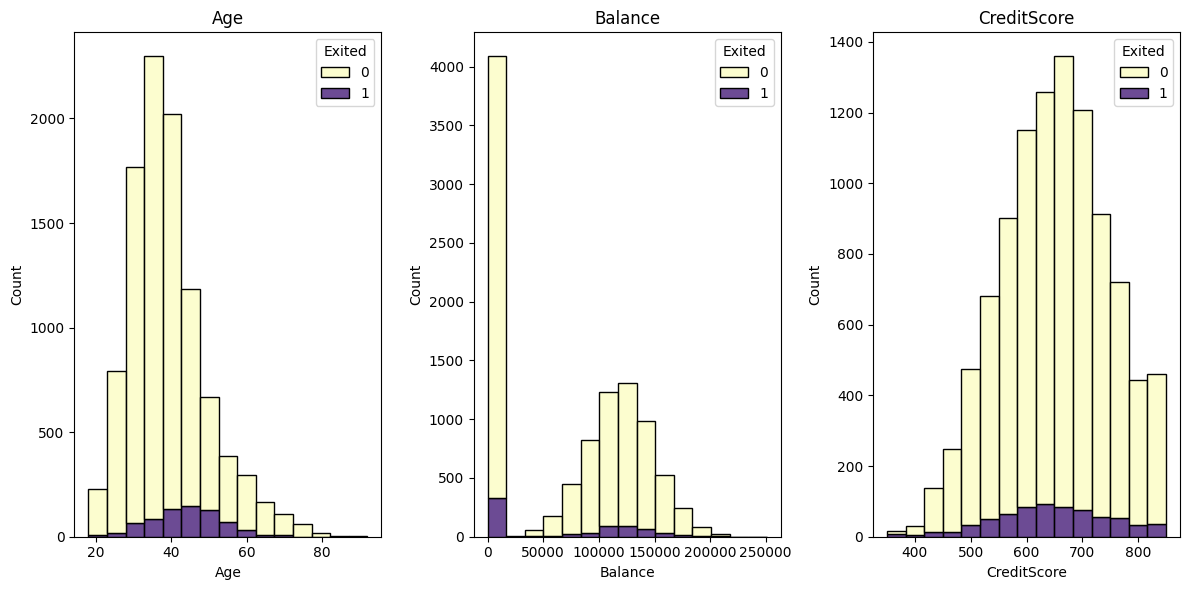

In [7]:
distributions = ['Age', 'Balance', 'CreditScore']  
titles = ['Age', 'Balance', 'CreditScore']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))  

for i, ax in enumerate(axes):
    sns.histplot(data=df, x=distributions[i], hue='Exited', multiple='stack', 
                 palette=color_palette, edgecolor='black', bins=15, ax=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


### 2.2 Perfil de Gênero e Comportamento de Churn :

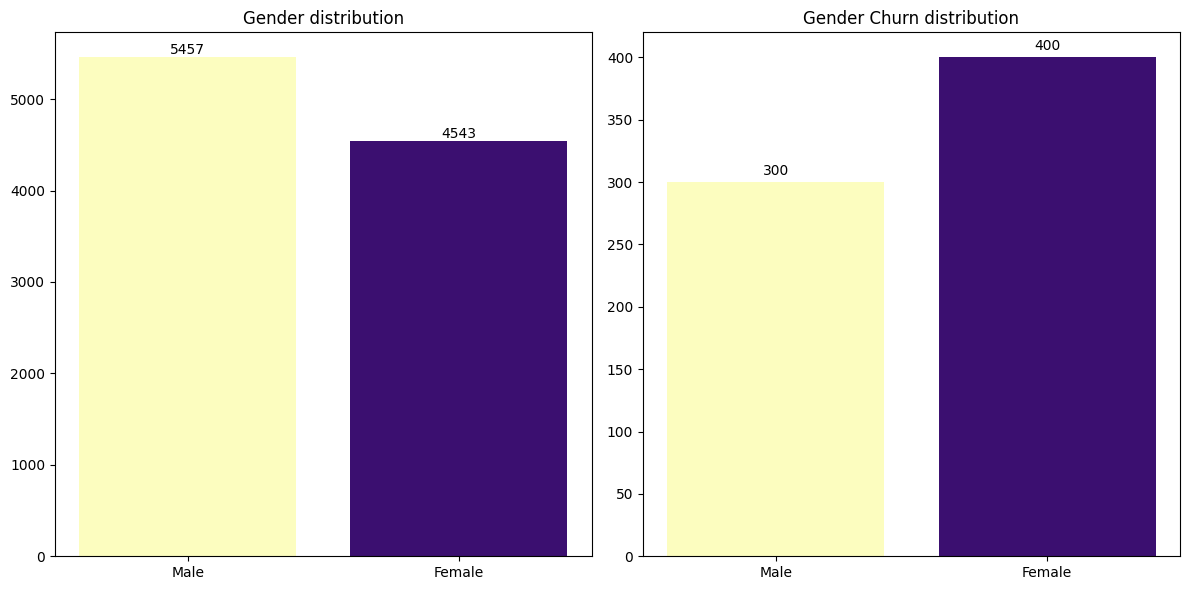

In [8]:
x = df['Gender'].value_counts().index
y = df['Gender'].value_counts().values

Male_churn = df[(df['Gender'] == 'Male') & (df['Exited'] == 1)].shape[0]
Female_churn = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)].shape[0]
churn_values = [Male_churn, Female_churn]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.bar(x, y, color=color_palette)
ax1.set_title('Gender distribution')
ax1.bar_label(ax1.bar(x, y, color=color_palette), labels=[f'{int(value)}' for value in y])

ax2.bar(x, churn_values,color=color_palette )
ax2.set_title('Gender Churn distribution')
ax2.bar_label(ax2.bar(x, churn_values,color=color_palette ), labels=[f'{int(value)}' for value in churn_values], padding=3)

plt.tight_layout()
plt.show()

 ### 2.3  Distribuições do salário estimado e pontos ganhos : 

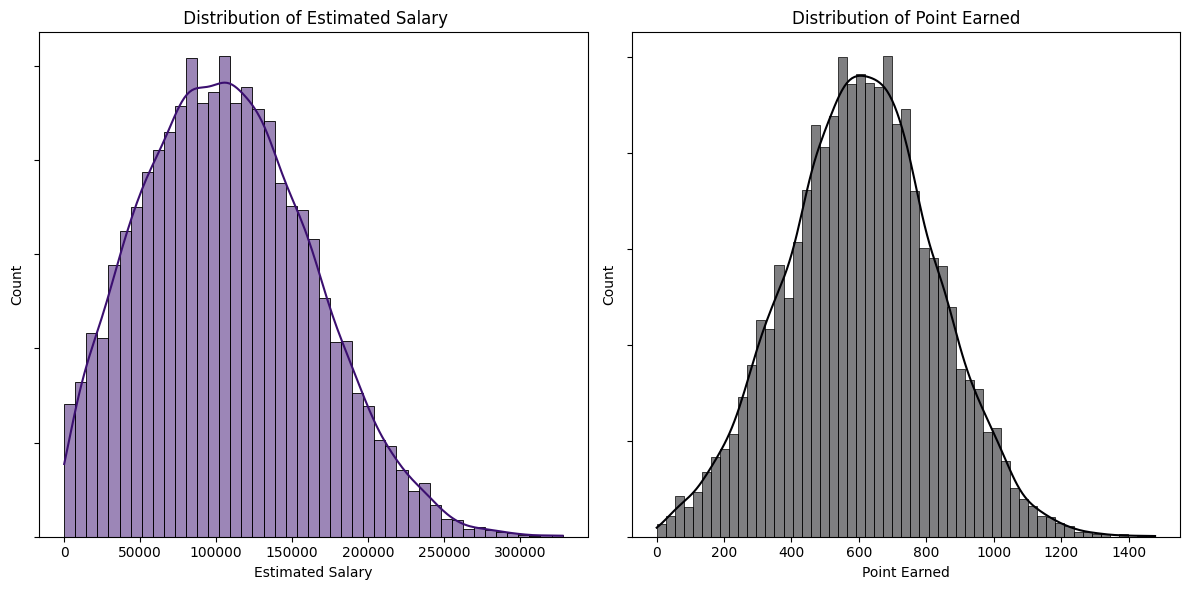

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['EstimatedSalary'], color='#3b0f70', ax=axes[0], kde=True)
axes[0].set_title(' Distribution of Estimated Salary')
axes[0].set_xlabel('Estimated Salary')
axes[0].set_yticklabels([])


sns.histplot(df['Point Earned'], color='#000004', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Point Earned')
axes[1].set_xlabel('Point Earned')
axes[1].set_yticklabels([])

plt.tight_layout()
plt.show()



- **Estimated Salary** → Distribuição quase normal, porém com leve assimetria positiva devido a salários mais altos.  
- **Point Earned** → Distribuição muito bem comportada, praticamente normal, indicando um processo mais uniforme.


### 2.4 Uma análise sobre os membros ativos : 

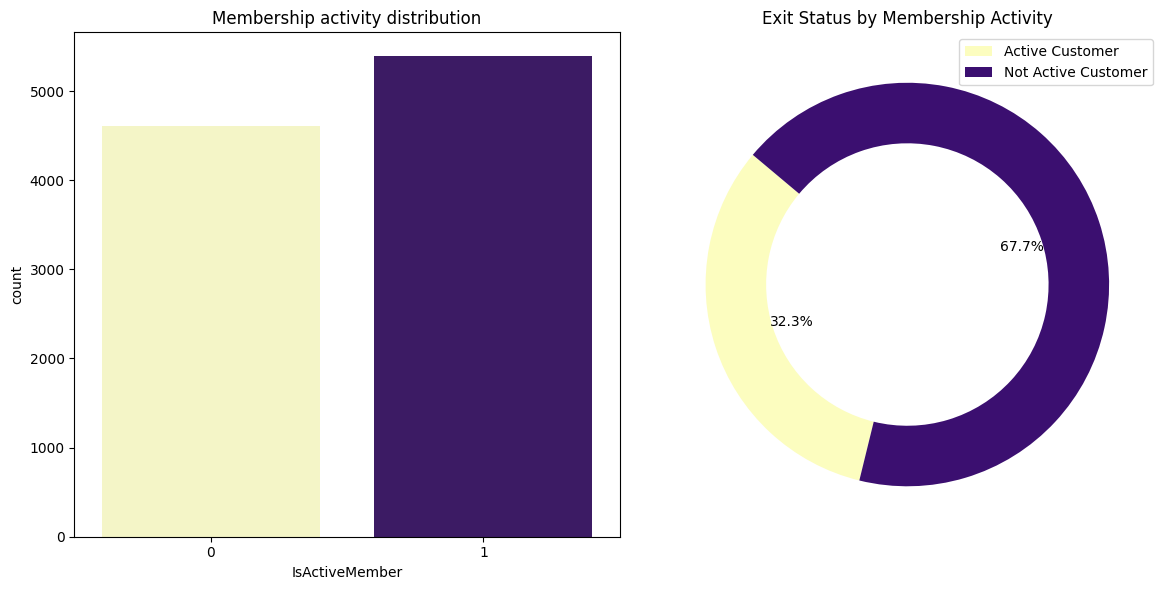

In [10]:
active_exited = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)].shape[0]
not_active_exited = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)].shape[0]
churn_data = [active_exited, not_active_exited]
churn_labels = ['Active Customer', 'Not Active Customer']

fig, axes = plt.subplots(1,2, figsize = (12,6))

sns.countplot(data=df, x=df.IsActiveMember, palette=color_palette, ax=axes[0])
axes[0].set_title('Membership activity distribution')

axes[1].pie(churn_data, autopct='%1.1f%%', colors=color_palette, startangle=140, wedgeprops=dict(width=0.3))
axes[1].legend(labels=churn_labels, loc='best')
axes[1].set_title('Exit Status by Membership Activity')


plt.tight_layout()
plt.show()

In [11]:

total = len(df)

inactive_churn = df[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)]
inactive_churn_pct = (len(inactive_churn) / total) * 100

active_churn = df[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)]
active_churn_pct = (len(active_churn) / total) * 100

print(f"Porcentagem de clientes INATIVOS que saíram (Exited=1): {inactive_churn_pct:.2f}%")
print(f"Porcentagem de clientes ATIVOS que saíram (Exited=1):   {active_churn_pct:.2f}%")


Porcentagem de clientes INATIVOS que saíram (Exited=1): 4.74%
Porcentagem de clientes ATIVOS que saíram (Exited=1):   2.26%


- A base apresenta **mais clientes ativos do que inativos**, indicando um perfil geral de engajamento relativamente alto.

- Aproximadamente **67,7% de todas as saídas (churn)** vieram de clientes **ativos**, o que mostra que, apesar de engajados, esse grupo ainda representa a maior parte dos desligamentos.

- Entre os clientes inativos, **4,74% do total** deixaram o banco — uma taxa **mais que duas vezes superior** à observada entre clientes ativos.  
  Isso sugere que **a inatividade é um forte indicador de risco**, já que clientes inativos possuem uma probabilidade significativamente maior de churn.



### 2.5  Uma visão geral sobre as reclamações : 

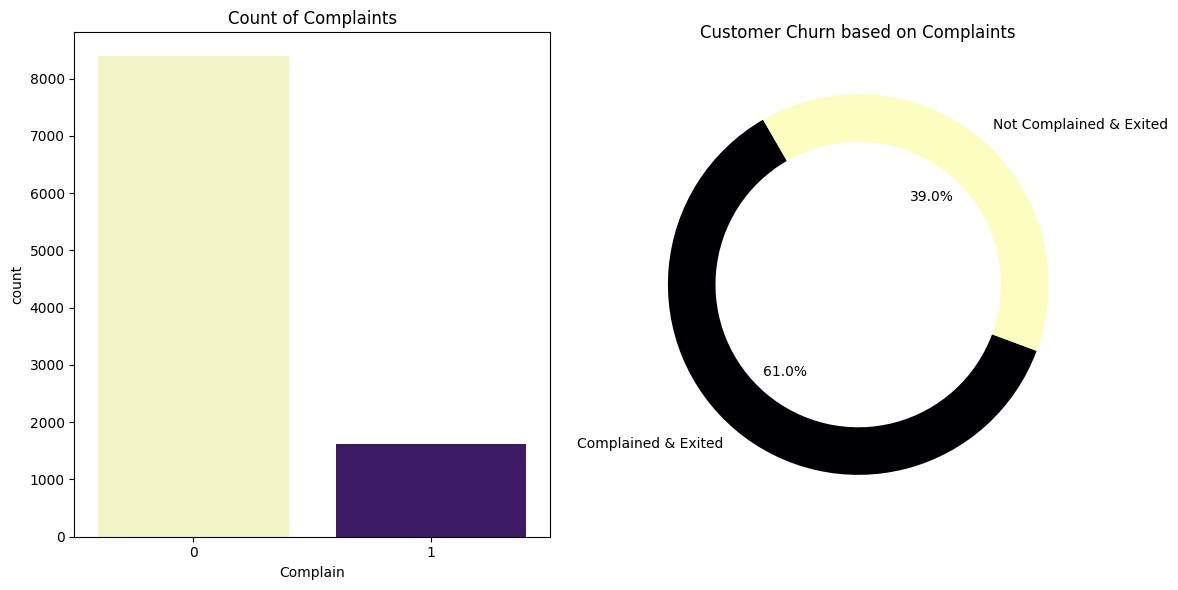

Complain
0    8389
1    1611
Name: count, dtype: int64

In [12]:
complained = df[(df['Complain'] == 1) & (df['Exited'] == 1)].shape[0]
not_complained = df[(df['Complain'] == 0) & (df['Exited'] == 1)].shape[0]
complaints = [complained, not_complained]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=df, x='Complain', ax=ax1, palette=color_palette)
ax1.set_title('Count of Complaints')

ax2.pie(complaints, autopct='%1.1f%%', labels=['Complained & Exited', 'Not Complained & Exited'], colors=['#000004','#fcfdbf'], startangle=120, wedgeprops=dict(width=0.25))
ax2.set_title('Customer Churn based on Complaints')

plt.tight_layout()

plt.show()

df['Complain'].value_counts()


In [13]:
churn_by_satisfaction = df[df['Exited'] == 1]['Satisfaction Score'].value_counts().sort_index()

print(churn_by_satisfaction)


Satisfaction Score
1    537
2    163
Name: count, dtype: int64


- Podemos notar que existe um desbalanceamento na variável Complain:
apenas **16,11%** dos clientes realizaram reclamações.

-  de pouco frequente, a variável Complain está **fortemente** associada à saída (churn):
**61%** dos clientes que reclamaram acabaram saindo.

- Ao analisarmos mais profundamente os clientes que reclamaram e saíram, observamos que:
**100%** desses clientes possuem Satisfaction Score igual a 1 ou 2.


### 2.6 Segmentação do Tempo de permanência (Tenure) e as relações com as saídas : 

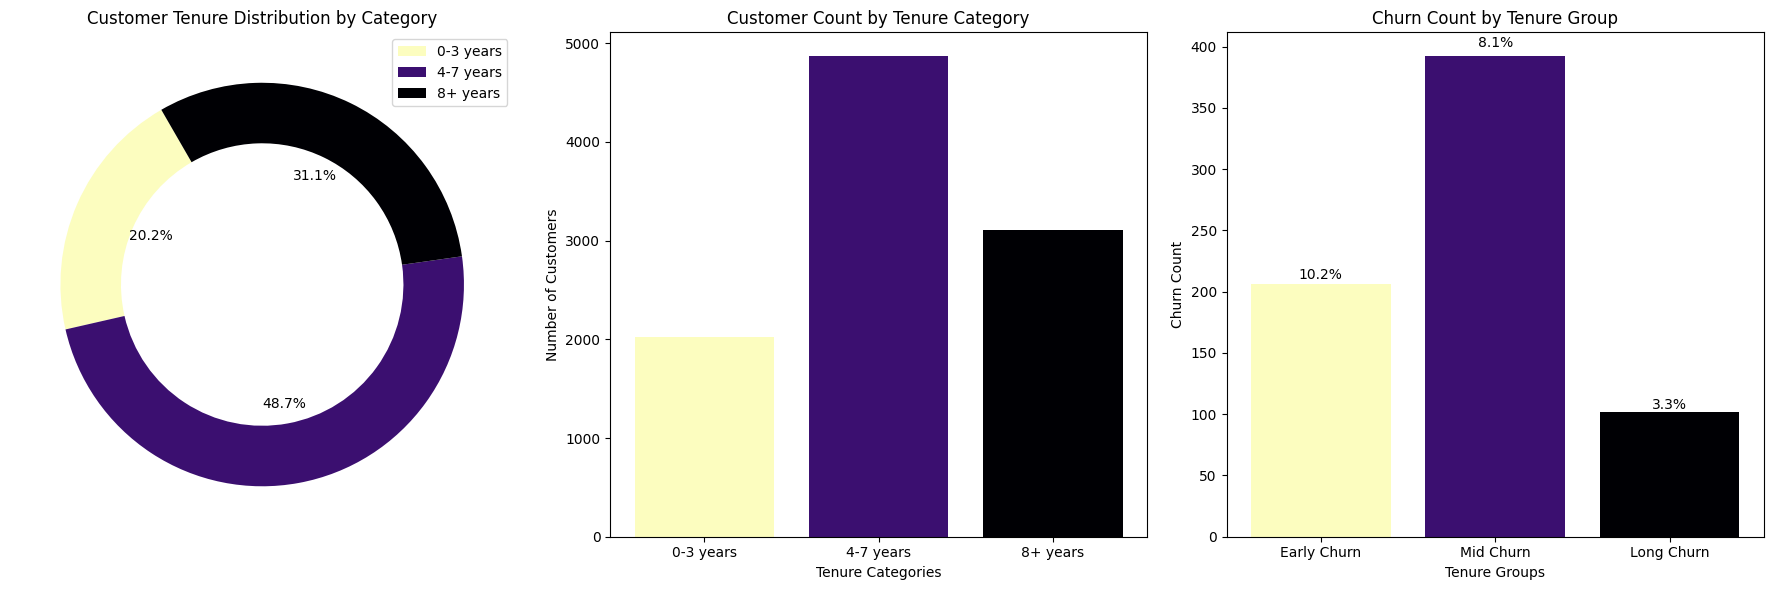

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df['Tenure_Group'] = pd.cut(
    df['Tenure'],
    bins=[-1, 3, 7, df['Tenure'].max()],
    labels=['0-3 years', '4-7 years', '8+ years']
)

tenure_counts = df['Tenure_Group'].value_counts().sort_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].pie(
    tenure_counts,
    autopct='%1.1f%%',
    colors=color_palette,
    startangle=120,
    wedgeprops=dict(width=0.3)
)
ax[0].legend(labels=['0-3 years', '4-7 years', '8+ years'], loc='best')
ax[0].set_title('Customer Tenure Distribution by Category')


ax[1].bar(['0-3 years', '4-7 years', '8+ years'], tenure_counts, color=color_palette)
ax[1].set_xlabel('Tenure Categories')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Customer Count by Tenure Category')


df['Tenure_Group_Churn'] = pd.cut(
    df['Tenure'],
    bins=[-1, 3, 7, df['Tenure'].max()],
    labels=['Early Churn', 'Mid Churn', 'Long Churn']
)

churn_counts = df[df['Exited'] == 1].groupby('Tenure_Group_Churn').size()

group_totals = df.groupby('Tenure_Group_Churn').size()

churn_pct = (churn_counts / group_totals * 100).fillna(0)

ax[2].bar(churn_counts.index, churn_counts.values, color=color_palette)
ax[2].set_ylabel('Churn Count')
ax[2].set_xlabel('Tenure Groups')
ax[2].set_title('Churn Count by Tenure Group')

for i, (count, pct) in enumerate(zip(churn_counts.values, churn_pct.values)):
    ax[2].text(i, count + (count * 0.02) , f"{pct:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


- Podemos observar que a maior parte dos clientes possui entre 4 e 7 (**48.7%**) anos de relacionamento com o banco. Já o grupo com 0 a 3 anos de permanência representa a menor parcela da base (**20.2%**).

- Entretanto, apesar de serem minoria, os clientes mais novos são justamente os que mais estão saindo. Esse comportamento indica uma possível dificuldade do banco em reter clientes no início do ciclo de relacionamento, o que pode sinalizar problemas na experiência inicial, no onboarding ou na percepção de valor logo nos primeiros anos.

## 3. Pré-processamento

### 3.1 Codificação de variáveis categóricas (categorical encoding) :

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()

categorical_cols = ['Gender', 'Card Type', 'Tenure_Group', 'Tenure_Group_Churn']

df[categorical_cols] = ordinal.fit_transform(df[categorical_cols])


Optei por utilizar **Ordinal Encoding** para transformar as variáveis categóricas em valores numéricos porque o modelo escolhido para a etapa de modelagem é o Random Forest. Esse tipo de algoritmo, baseado em árvores de decisão, não é sensível à ordem numérica atribuída às categorias.

Além disso, o uso do **OneHotEncoder** não se faz necessário nesse caso. Esse método criaria diversas novas colunas (uma para cada categoria), o que **aumentaria a dimensionalidade** do dataset sem trazer benefícios reais para modelos de árvore.

### 3.2 Com as variáveis estando em forma numérica podemos ver as correlações com a variável alvo : 

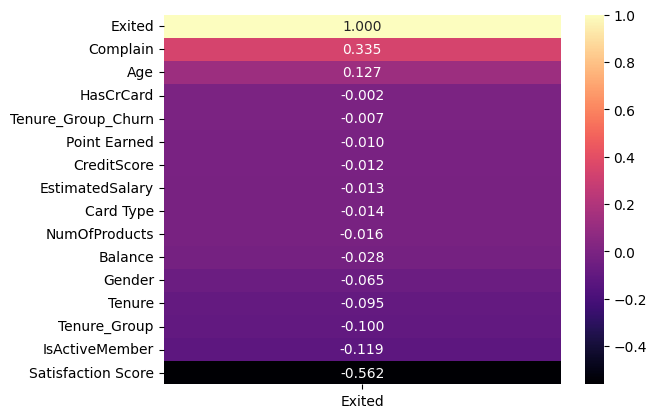

In [16]:
correlation_matrix = df.corr()[['Exited']].sort_values(by='Exited', ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.3f')
plt.show()

#### Variáveis mais correlacionadas com o churn : 

- **Satisfaction Score (−0.562)**
É o fator mais importante. Quanto menor a satisfação, maior a probabilidade de churn. Isso indica que clientes insatisfeitos tendem a sair muito mais.

- **Complain (0.335)**
Clientes que registram reclamações têm forte tendência a deixar o banco. É o segundo fator mais influente.

- **Age (0.127)**
Clientes mais velhos apresentam maior chance de churn.

- **IsActiveMember (-0.119)**
Clientes inativos apresentam maior chance de saída

### 3.3 Divisão da base de dados em conjunto de treino e teste :

In [22]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Tenure_Group',
       'Tenure_Group_Churn'],
      dtype='object')

Inicialmente iremos dividir o conjunto de dados nos subconjuntos X (variáveis explicativas) e y(variável alvo). Em seguida iremos dividir esses dados nos conjuntos de treino e validação com a função train_test_split do módulo model_selection da biblioteca Scikit-learn.

Utilizaremos 30% dos dados para teste e 70% para treino.

In [23]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Exited', 'Tenure_Group', 'Tenure_Group_Churn'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

### 3.4 Utilizando o SMOTE :

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de balanceamento de classes que gera amostras sintéticas para a classe minoritária em um conjunto de dados desbalanceado.

Em vez de simplesmente duplicar exemplos (oversampling tradicional), o SMOTE:

- Cria novas amostras artificialmente,

- Com base na interpolação entre pontos existentes da classe minoritária,

- Mantendo a distribuição mais realista e evitando overfitting.

**Neste dataset , a variável Exited é altamente desbalanceada (a maioria dos clientes NÃO sai, poucos saem), isto causa vários problemas :**


- O modelo aprende a prever sempre a classe majoritária,

- Acurácia fica “artificialmente alta”,

- Métricas importantes como Recall da classe 1 (churn) ficam ruins,

- O modelo deixa de detectar quem realmente pode sair (o que é o objetivo do projeto).

**Ao utilizar o SMOTE e fazermos oversampling o problema causado pela classe desbalanceada desaparece.**

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Antes do SMOTE:", y_train.value_counts())
print("Depois do SMOTE:", y_train_res.value_counts())

Antes do SMOTE: Exited
0    6535
1     465
Name: count, dtype: int64
Depois do SMOTE: Exited
0    6535
1    6535
Name: count, dtype: int64


## 4. Treinamento e avaliação do modelo

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest.fit(X_train_res,y_train_res)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
random_forest.fit(X_train_res, y_train_res)


pred_proba = random_forest.predict_proba(X_test)[:, 1]

threshold = 0.35


y_pred = (pred_proba > threshold).astype(int)


print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, pred_proba))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2765
           1       0.83      0.97      0.89       235

    accuracy                           0.98      3000
   macro avg       0.91      0.97      0.94      3000
weighted avg       0.98      0.98      0.98      3000

ROC-AUC: 0.9945873571620946


Classe 0 (Não saiu) : 

- Precision: **1.00** → Quase não há falsos positivos (o modelo raramente diz que alguém vai sair quando não vai).

- Recall: **0.98** → Identifica praticamente todos os clientes que realmente não saem.

- F1-score: **0.99** → Excelente equilíbrio entre precisão e recall.

Classe 1 (Churn) :

Precision: **0.83**
Quando o modelo prevê churn, ele está certo **83%** das vezes.
Isso é muito bom para a classe minoritária.

Recall: **0.97**
O modelo consegue identificar **97%** dos clientes que realmente saem, que é extremamente alto.
Esse é o número mais importante no problema de churn.

🎯  Um recall tão alto na classe 1 é de **extrema importância**, pois permite agir antes que o cliente saia — o objetivo principal de um projeto de churn.
O modelo possui uma variável de threshold (limiar) que é o valor de probabilidade a partir do qual o modelo classifica um cliente como churn. Por padrão, modelos usam 0.5, mas esse valor não é ideal em problemas desbalanceados como churn. Ajustar o threshold permite controlar quando o modelo deve considerar que um cliente realmente vai sair.
Valores mais baixos (ex.: 0.3) aumentam a sensibilidade do modelo, identificando mais clientes que podem sair. Valores mais altos (ex.: 0.7) tornam o modelo mais conservador, evitando falsos alarmes. churn, normalmente queremos capturar o máximo de clientes que vão sair, então um threshold menor costuma ser mais adequado. Assim, o modelo não fica preso ao padrão 0.5 e pode ser adaptado à estratégia da empresa, aumentando sua eficácia prática.

F1-score: **0.89**
Indica ótimo equilíbrio entre capturar quem sai e evitar alarmes falsos.


O ROC-AUC mede a capacidade do modelo separar clientes que saem dos que ficam.
- Isso mostra que o modelo é extremamente competente em distinguir as classes — é um modelo altamente discriminativo.

### 5. Conclusão do Projeto — Modelo de Predição de Churn 

### A matriz de confusão :

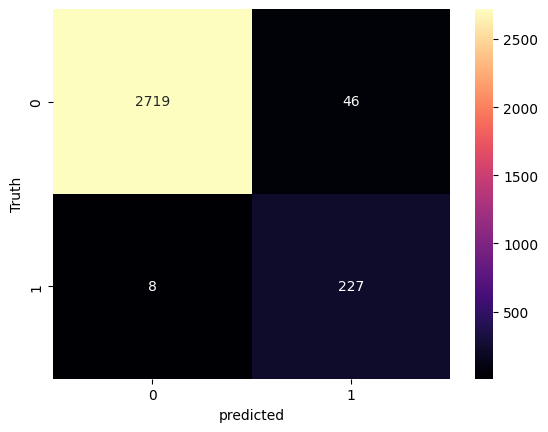

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='magma', fmt = "d")
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

## ⭐ Desempenho Final do Modelo :

#### **A matriz de confusão abaixo resume com clareza a performance alcançada:**

**Verdadeiros Negativos (TN): 2719**
Clientes que não deixaram a empresa e foram corretamente classificados.

**Falsos Positivos (FP): 46**
Clientes previstos como churn, mas que permaneceram — impacto operacional baixo.

**Falsos Negativos (FN): 8**
Clientes que saíram, mas o modelo não identificou — número extremamente baixo.

**Verdadeiros Positivos (VP): 227**
Clientes que realmente deixaram a empresa e foram corretamente previstos.

**Essa configuração demonstra que o modelo consegue identificar quase todos os churners, mantendo baixo o volume de alarmes falsos.**

## ✔️ Conclusão Final :

- O modelo desenvolvido é altamente eficaz para prever churn, atingindo:

 - 97% de detecção dos clientes que realmente saem,

- baixo número de falsos negativos,

- excelente capacidade de discriminação,

- forte utilidade prática para tomada de decisão.

- Ele está pronto para ser integrado em pipelines de decisão, dashboards de monitoramento ou sistemas de alerta precoce.
Também serve como base sólida para estratégias de retenção, ofertas personalizadas e intervenções preventivas.